<a href="https://colab.research.google.com/github/erikaguiracocha/Data-Visualization-2025/blob/main/PS3erikaguiracocha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PS 3 Instructions**

**PS 3**
1. tell a story with vis, say 1-10 graphs, the fewer the better!, focus on what the data are telling us, make it engaging and
utilitarian/useful
2. don’t overcomplicate, best stories are simple (but be thorough, do the work, do robustness checks, triangulate, etc–all of that
in notebook, but then the story you tell and present is basic and simple, top of the iceberg, the choisest, the cream of the
crop)–its like top research say in nature or science–it’s a page or two (but its based on say 20 or 50 pages of output in appendix
or supplementray material)
3. bar is higher than ps2

#**Dataset Overview Research Question**

**Dataset Overview and Research Focus:**
I will analyze data from 21 counties in New Jersey from 2020 to 2022 to explore how crime rates affect police budget allocation.

**Research Question:**
How do crime rates in New Jersey counties influence police budget allocation?

**Hypothesis:**
I hypothesize that counties with higher crime rates will allocate a larger proportion of their budget to the police, as they will need more **resources** to handle the increased demand for police services.

**Key Variables:**

**Crime Data:** Total number of reported crimes in each county per year. This represents the crime level and impacts police budget allocation.

**Police Budget:** Total amount allocated to the police department in each county.

**County:** Name of each county in New Jersey.

**Year:** Year of the data (2020, 2021, 2022).
Data Sources:

**Crime Data:** Obtained from the New Jersey Department of Law and Public Safety.

**Police Budget:** Annual reports from the New Jersey Division of Local Government Services.

**Socioeconomic Data:** Population estimates from the New Jersey Department of Labor and Workforce Development.

**Data Justification:**
The crime and police budget data are essential for understanding the relationship between crime rates and budget allocation. Socioeconomic data (e.g., population size) will help contextualize the findings. Data from multiple years will allow us to identify trends and changes in how counties respond to crime rates over time.

**Map of New Jersey by County**

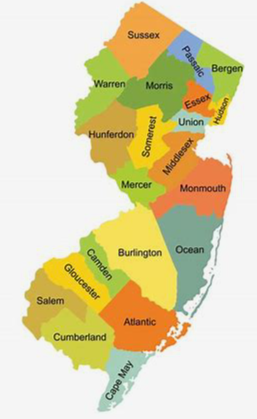

#**Visualization of a map for New Jersey Counties**

In [41]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the geospatial data for New Jersey counties from the GeoJSON file
url_geojson = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/main/NJ_Counties_3424_-8325300193892812354%20(2).geojson'
gdf = gpd.read_file(url_geojson)

# Check the first values of the 'REGION' column to see if it contains the county names
print(gdf['REGION'].head())

# Rename the 'REGION' column to 'County' if it contains the county names
gdf = gdf.rename(columns={'REGION': 'County'})

# Load the crime and budget data
url_crime_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/crime%20by%20county%20New%20Jersey.csv'
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'

crime_data = pd.read_csv(url_crime_data, header=1)
budget_data = pd.read_csv(url_budget_data, header=1)

# Clean the data (remove rows with null values)
crime_data = crime_data.dropna(subset=['2020'])
budget_data = budget_data.dropna(subset=['2020'])

# Rename columns to match the county names in the GeoJSON
crime_data = crime_data[['County', '2020']]
budget_data = budget_data[['County', '2020']]

# Rename the columns for easier merging
crime_data.columns = ['County', 'Crime_2020']
budget_data.columns = ['County', 'Budget_2020']

# Merge the crime and budget data
merged_data = pd.merge(crime_data, budget_data, on='County', how='left')

# Merge the geospatial data with the crime and budget data
gdf = gdf.merge(merged_data, on='County')

# Create a map centered on New Jersey
m = folium.Map(location=[40.0583, -74.4057], zoom_start=8)

# Create a heatmap based on crimes ('Crime_2020' value)
HeatMap(data=gdf[['geometry', 'Crime_2020']].dropna(), radius=15).add_to(m)

# Create a heatmap based on the budget ('Budget_2020' value)
HeatMap(data=gdf[['geometry', 'Budget_2020']].dropna(), radius=15).add_to(m)

# Display the map
m


0         COASTAL
1    NORTHEASTERN
2        SOUTHERN
3        SOUTHERN
4         COASTAL
Name: REGION, dtype: object


<ipython-input-41-2c3285e073f8>:45: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  HeatMap(data=gdf[['geometry', 'Crime_2020']].dropna(), radius=15).add_to(m)
<ipython-input-41-2c3285e073f8>:48: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  HeatMap(data=gdf[['geometry', 'Budget_2020']].dropna(), radius=15).add_to(m)


#**Uploaded Data**

In [ ]:
import pandas as pd  #original crime data uploaded
url_crime_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/crime%20by%20county%20New%20Jersey.csv'
crime_data = pd.read_csv(url_crime_data, header=1)
print("Original Crime Data:")
print(crime_data.head(30))  # Show 21 counties

Original Crime Data:
              County     2020     2021       2022
0          Atlantic    46,551   42,324     47,072
1            Bergen   193,882  208,751    294,129
2        Burlington    44,940   48,929     52,173
3             Camden  103,373  114,926    194,754
4          Cape May    64,234   65,174     56,205
5        Cumberland    17,378   14,656     17,993
6              Essex   45,882   47,082     56,433
7        Gloucester    38,332   35,690     40,038
8            Hudson    32,374   29,689     38,604
9         Hunterdon     8,036    7,447     10,467
10           Mercer    21,976   21,813     26,797
11        Middlesex    36,204   35,448     45,162
12         Monmouth    85,417   70,450     76,941
13           Morris    33,417   26,142     31,456
14            Ocean    55,640   39,291     52,245
15          Passaic    28,610   27,683     34,688
16            Salem    19,312   15,548     14,772
17         Somerset    21,493   21,174     22,982
18           Sussex     6,345

In [ ]:
# Uploaded data
url_population_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/population%20by%20county%20New%20Jersey.csv'
population_data = pd.read_csv(url_population_data)

# Population
print("Original Population Data:")
print(population_data.head(30))

Original Population Data:
   Annual Estimates of the Resident Population for Counties in New Jersey: 2020 to  2022  \
0                                              County                                      
1                                           Atlantic                                       
2                                             Bergen                                       
3                                         Burlington                                       
4                                             Camden                                       
5                                           Cape May                                       
6                                         Cumberland                                       
7                                              Essex                                       
8                                         Gloucester                                       
9                                             Hudson  

In [ ]:
# URL of the CSV file
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'

# Try to read the file
try:
    # If the second row is the header, use header=1
    budget_data = pd.read_csv(url_budget_data, header=1)
    print("Original Budget Data:")
    print(budget_data.head(30))  # Display the first 30 rows

except Exception as e:
    print(f"There was an error loading the file: {e}")

Original Budget Data:
              County              2020              2021              2022
0          Atlantic     119,262,425.86    117,407,829.60    123,993,860.75
1            Bergen     427,518,344.81    448,124,550.75    471,782,982.68
2        Burlington     122,407,763.95    125,868,638.98    128,190,733.44
3            Camden     137,420,012.72    135,626,159.37    147,391,782.25
4          Cape May      48,629,849.27     52,207,062.40     54,103,285.95
5        Cumberland      35,045,613.87     36,259,361.36     37,329,195.20
6             Essex     350,382,509.60    464,878,127.99    381,983,364.75
7        Gloucester      67,519,873.43     65,845,717.39     79,816,171.41
8            Hudson     290,272,331.25    300,219,111.87    377,519,753.78
9         Hunterdon      28,100,764.97     29,438,131.72     31,540,757.26
10           Mercer      93,981,950.66    104,382,301.52     97,266,160.77
11        Middlesex     253,427,739.92    292,934,332.15    331,800,018.84
12 

#**Bar Chart (Comparison of Crime and Police Budget by County) 2020 - 2022**

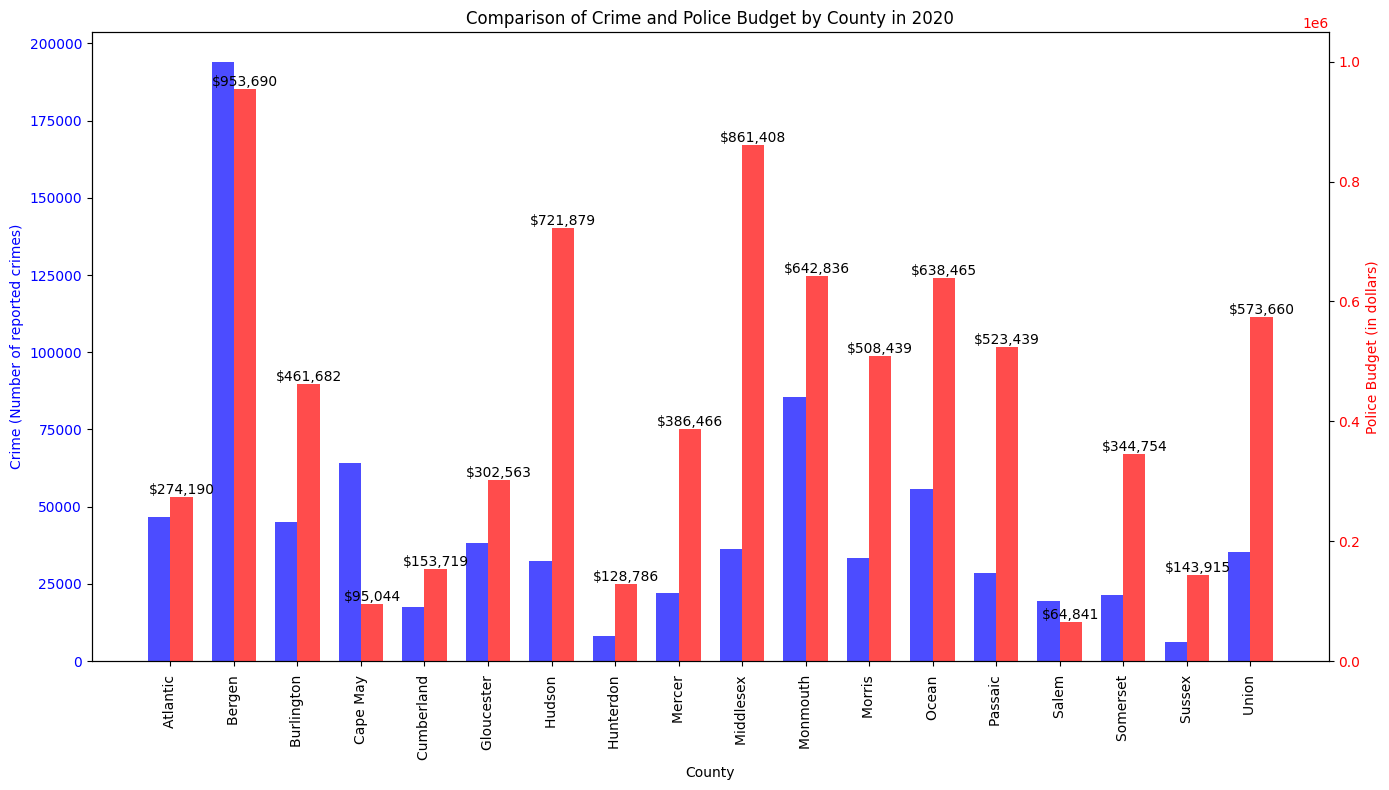

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load crime data
crime_data = pd.read_csv(url_crime_data, header=1)

# Clean crime data (remove "Total New Jersey" and convert values to numeric)
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']
crime_data['2020'] = crime_data['2020'].str.replace(',', '').astype(float)

# Load population data
url_population_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/population%20by%20county%20New%20Jersey.csv'
population_data = pd.read_csv(url_population_data)

# Clean population data (remove commas and keep only relevant columns)
population_data = population_data.iloc[1:, [0, -3]]  # Keep only county and 2020 data
population_data.columns = ['County', '2020']

# Remove commas from the population column and convert to float
population_data['2020'] = population_data['2020'].str.replace(',', '').astype(float)

# Load police budget data
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'
budget_data = pd.read_csv(url_budget_data, header=1)

# Clean budget data (remove commas and convert values to numeric)
budget_data['2020'] = budget_data['2020'].str.replace(',', '').astype(float)

# Merge the three datasets into one DataFrame using the County column
merged_data = crime_data.merge(population_data, on='County').merge(budget_data, on='County')

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Define bar width
bar_width = 0.35

# Define the position of the bars on the x-axis
x = np.arange(len(merged_data))

# Bar chart for crime data (left y-axis, blue color)
bars_crime = ax1.bar(x - bar_width / 2, merged_data['2020_x'], bar_width, color='blue', label='Crime', alpha=0.7)

# Set labels for the left y-axis
ax1.set_xlabel('County')
ax1.set_ylabel('Crime (Number of reported crimes)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(merged_data['County'], rotation=90)

# Create a second y-axis (right side) for the budget data
ax2 = ax1.twinx()

# Bar chart for police budget data (right y-axis, red color)
bars_budget = ax2.bar(x + bar_width / 2, merged_data['2020_y'], bar_width, color='red', label='Police Budget', alpha=0.7)

# Set labels for the right y-axis
ax2.set_ylabel('Police Budget (in dollars)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set proper range for the right y-axis (budget axis)
ax2.set_ylim(0, merged_data['2020_y'].max() * 1.1)  # 10% buffer above the maximum budget value

# Add annotations for budget values
for i, bar in enumerate(bars_budget):
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, f'${yval:,.0f}', ha='center', va='bottom', color='black')

# Title and layout adjustments
plt.title('Comparison of Crime and Police Budget by County in 2020')

# Ensure all the labels and axes are displayed properly
fig.tight_layout()

# Show the plot
plt.show()


**Interpretation**: The bar chart compares the crime rates and police budget allocations across the counties in New Jersey for the year 2020. Blue bars represent the total reported crimes in each county, while red bars show the corresponding police budget allocations. As expected, counties with higher crime rates tend to allocate more funds to their police departments, such as Bergen and Camden. However, some counties with lower crime rates, like Hunterdon, still maintain relatively high police budgets. This suggests that while crime influences budget decisions, other factors such as population size or local policies may also play a role.

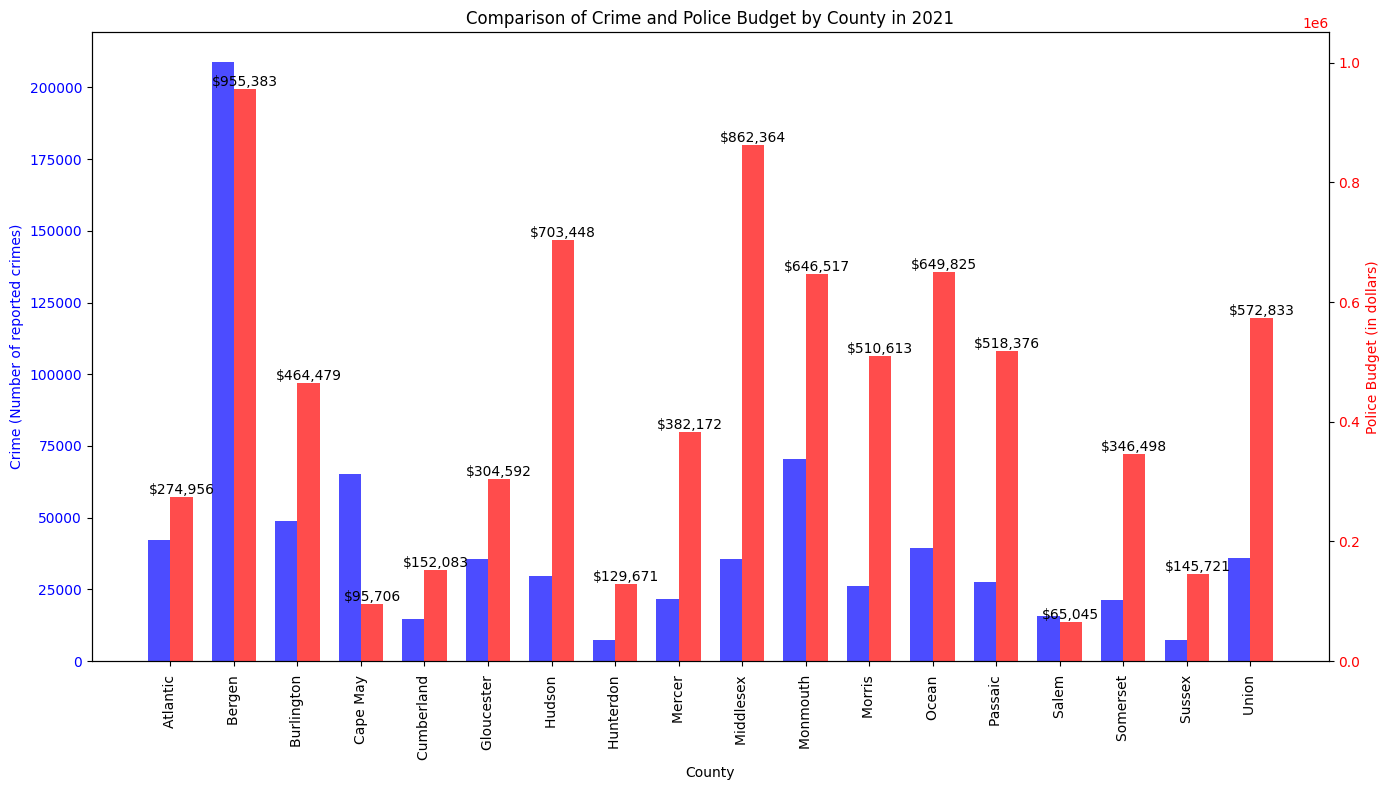

In [14]:
# Load crime data
crime_data = pd.read_csv(url_crime_data, header=1)

# Clean crime data (remove "Total New Jersey" and convert values to numeric)
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']
crime_data['2021'] = crime_data['2021'].str.replace(',', '').astype(float)

# Load population data
url_population_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/population%20by%20county%20New%20Jersey.csv'
population_data = pd.read_csv(url_population_data)

# Clean population data (remove commas and keep only relevant columns)
population_data = population_data.iloc[1:, [0, -2]]  # Keep only county and 2021 data
population_data.columns = ['County', '2021']

# Remove commas from the population column and convert to float
population_data['2021'] = population_data['2021'].str.replace(',', '').astype(float)

# Load police budget data
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'
budget_data = pd.read_csv(url_budget_data, header=1)

# Clean budget data (remove commas and convert values to numeric)
budget_data['2021'] = budget_data['2021'].str.replace(',', '').astype(float)

# Merge the three datasets into one DataFrame using the County column
merged_data = crime_data.merge(population_data, on='County').merge(budget_data, on='County')

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Define bar width
bar_width = 0.35

# Define the position of the bars on the x-axis
x = np.arange(len(merged_data))

# Bar chart for crime data (left y-axis, blue color)
bars_crime = ax1.bar(x - bar_width / 2, merged_data['2021_x'], bar_width, color='blue', label='Crime', alpha=0.7)

# Set labels for the left y-axis
ax1.set_xlabel('County')
ax1.set_ylabel('Crime (Number of reported crimes)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(merged_data['County'], rotation=90)

# Create a second y-axis (right side) for the budget data
ax2 = ax1.twinx()

# Bar chart for police budget data (right y-axis, red color)
bars_budget = ax2.bar(x + bar_width / 2, merged_data['2021_y'], bar_width, color='red', label='Police Budget', alpha=0.7)

# Set labels for the right y-axis
ax2.set_ylabel('Police Budget (in dollars)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set proper range for the right y-axis (budget axis)
ax2.set_ylim(0, merged_data['2021_y'].max() * 1.1)  # 10% buffer above the maximum budget value

# Add annotations for budget values
for i, bar in enumerate(bars_budget):
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, f'${yval:,.0f}', ha='center', va='bottom', color='black')

# Title and layout adjustments
plt.title('Comparison of Crime and Police Budget by County in 2021')

# Ensure all the labels and axes are displayed properly
fig.tight_layout()

# Show the plot
plt.show()


**Interpretation:** The bar chart compares the crime rates and police budget allocations for New Jersey counties in 2021. The blue bars represent the number of reported crimes, while the red bars show the police budget allocated to each county. It is evident that counties with higher crime rates, such as Bergen and Camden, have larger police budgets. However, some counties with lower crime rates, like Hunterdon, still allocate significant amounts to their police departments. This suggests that crime is a major factor in budget decisions, but other factors, such as population size or local government priorities, may also influence budget allocations.

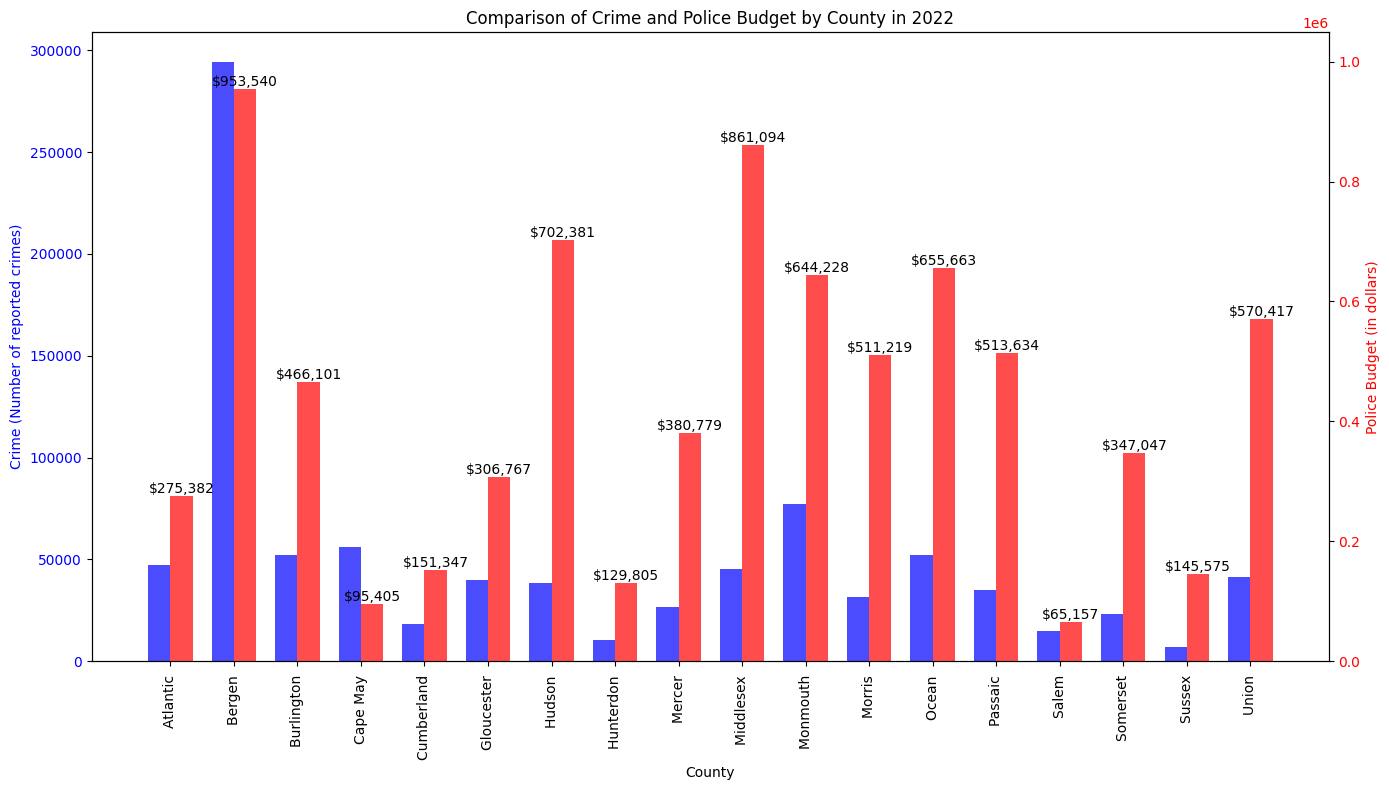

In [15]:
# Load crime data for 2022
crime_data = pd.read_csv(url_crime_data, header=1)

# Clean crime data (remove "Total New Jersey" and convert values to numeric)
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']
crime_data['2022'] = crime_data['2022'].str.replace(',', '').astype(float)

# Load population data for 2022
url_population_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/population%20by%20county%20New%20Jersey.csv'
population_data = pd.read_csv(url_population_data)

# Clean population data (remove commas and keep only relevant columns)
population_data = population_data.iloc[1:, [0, -1]]  # Keep only county and 2022 data
population_data.columns = ['County', '2022']

# Remove commas from the population column and convert to float
population_data['2022'] = population_data['2022'].str.replace(',', '').astype(float)

# Load police budget data for 2022
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'
budget_data = pd.read_csv(url_budget_data, header=1)

# Clean budget data (remove commas and convert values to numeric)
budget_data['2022'] = budget_data['2022'].str.replace(',', '').astype(float)

# Merge the three datasets into one DataFrame using the County column
merged_data = crime_data.merge(population_data, on='County').merge(budget_data, on='County')

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Define bar width
bar_width = 0.35

# Define the position of the bars on the x-axis
x = np.arange(len(merged_data))

# Bar chart for crime data (left y-axis, blue color)
bars_crime = ax1.bar(x - bar_width / 2, merged_data['2022_x'], bar_width, color='blue', label='Crime', alpha=0.7)

# Set labels for the left y-axis
ax1.set_xlabel('County')
ax1.set_ylabel('Crime (Number of reported crimes)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(merged_data['County'], rotation=90)

# Create a second y-axis (right side) for the budget data
ax2 = ax1.twinx()

# Bar chart for police budget data (right y-axis, red color)
bars_budget = ax2.bar(x + bar_width / 2, merged_data['2022_y'], bar_width, color='red', label='Police Budget', alpha=0.7)

# Set labels for the right y-axis
ax2.set_ylabel('Police Budget (in dollars)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set proper range for the right y-axis (budget axis)
ax2.set_ylim(0, merged_data['2022_y'].max() * 1.1)  # 10% buffer above the maximum budget value

# Add annotations for budget values
for i, bar in enumerate(bars_budget):
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, f'${yval:,.0f}', ha='center', va='bottom', color='black')

# Title and layout adjustments
plt.title('Comparison of Crime and Police Budget by County in 2022')

# Ensure all the labels and axes are displayed properly
fig.tight_layout()

# Show the plot
plt.show()


**Interpretation:** The bar chart compares crime rates and police budget allocations across New Jersey counties in 2022. The blue bars represent the number of reported crimes, while the red bars show the police budget allocated to each county. Counties with higher crime rates, like Camden and Bergen, tend to allocate more funds to their police departments. However, some counties with lower crime rates, such as Hunterdon, still allocate significant budgets. This suggests that while crime rates influence budget decisions, other factors like population size and local priorities may also play a role.

#**Line Chart (Trends over Time) 2020 - 2022**

<ipython-input-18-563623e1becd>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(merged_data['County']))  # Use a predefined color map


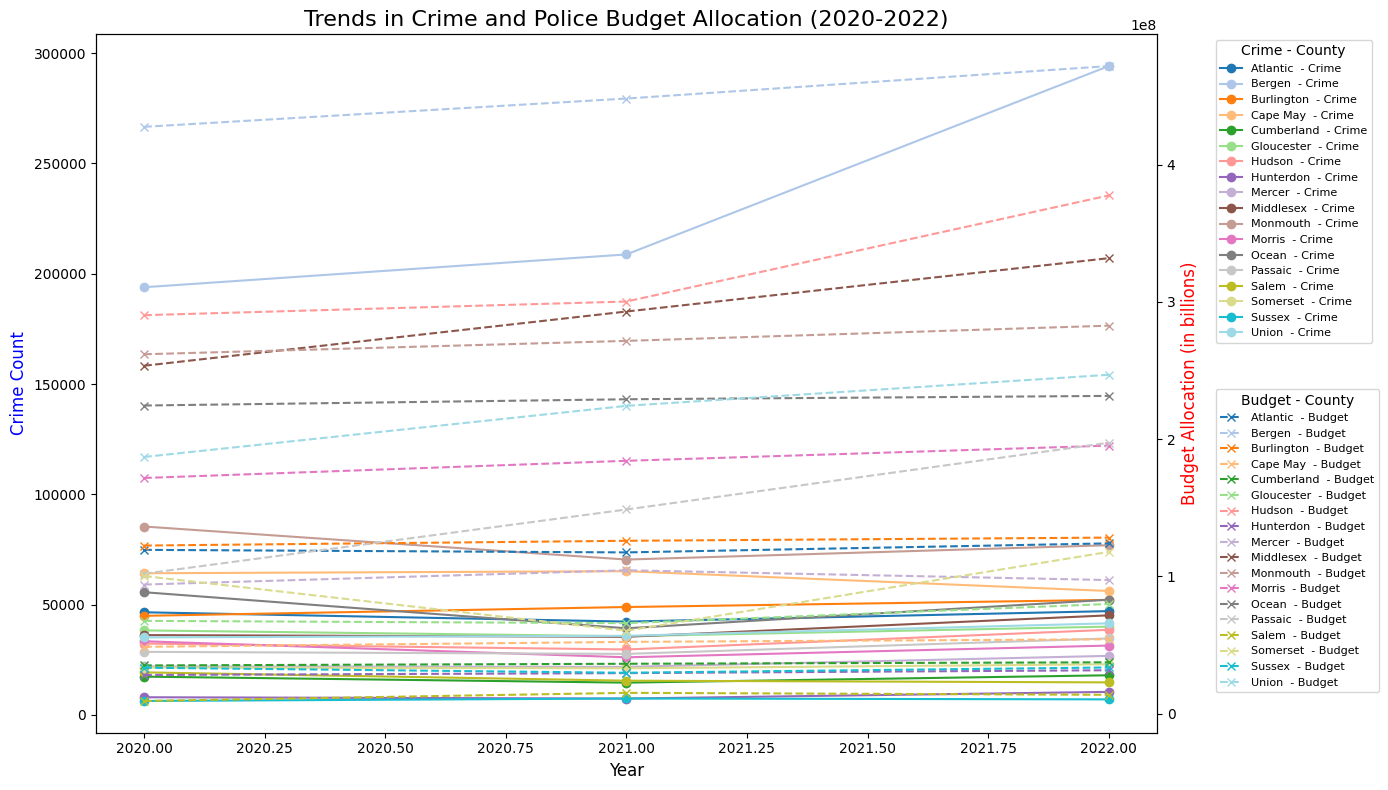

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load crime data for 2020, 2021, and 2022
url_crime_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/crime%20by%20county%20New%20Jersey.csv'
crime_data = pd.read_csv(url_crime_data, header=1)

# Clean crime data (remove "Total New Jersey" and convert values to numeric)
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']
crime_data[['2020', '2021', '2022']] = crime_data[['2020', '2021', '2022']].replace({',': ''}, regex=True).astype(float)

# Load police budget data for 2020, 2021, and 2022
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'
budget_data = pd.read_csv(url_budget_data, header=1)

# Clean budget data (remove commas and convert values to numeric)
budget_data[['2020', '2021', '2022']] = budget_data[['2020', '2021', '2022']].replace({',': ''}, regex=True).astype(float)

# Merge the crime and budget data by County
merged_data = crime_data.merge(budget_data, on='County', suffixes=('_crime', '_budget'))

# Create a color map to assign unique colors to each county
cmap = cm.get_cmap('tab20', len(merged_data['County']))  # Use a predefined color map

# Plot trends for crime and budget from 2020 to 2022
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot each county's crime data over time with ax1 (blue shades)
for idx, county in enumerate(merged_data['County']):
    color_crime = cmap(idx)  # Get a unique color for crime
    ax1.plot([2020, 2021, 2022],
             merged_data[merged_data['County'] == county][['2020_crime', '2021_crime', '2022_crime']].values.flatten(),
             label=f"{county} - Crime", linestyle='-', marker='o', color=color_crime)

# Create a second y-axis to plot the budget data
ax2 = ax1.twinx()

# Plot each county's budget data over time with ax2 (red shades)
for idx, county in enumerate(merged_data['County']):
    color_budget = cmap(idx)  # Get the same unique color for budget
    ax2.plot([2020, 2021, 2022],
             merged_data[merged_data['County'] == county][['2020_budget', '2021_budget', '2022_budget']].values.flatten(),
             label=f"{county} - Budget", linestyle='--', marker='x', color=color_budget)

# Title and labels
ax1.set_title('Trends in Crime and Police Budget Allocation (2020-2022)', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Crime Count', fontsize=12, color='blue')
ax2.set_ylabel('Budget Allocation (in billions)', fontsize=12, color='red')

# Add legend
ax1.legend(title='Crime - County', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax2.legend(title='Budget - County', bbox_to_anchor=(1.05, 0.5), loc='upper left', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()


**Interpretation:** The line chart demonstrates the trends in crime rates and police budget allocation across New Jersey counties from 2020 to 2022. While crime rates fluctuate across counties, some counties, such as Bergen and Camden, show a steady increase in both crime and budget. In contrast, counties like Sussex and Salem experience relatively stable crime rates, with corresponding small changes in their budgets. The chart highlights that counties with higher crime rates often allocate more funds to police, reflecting a potential response to increased demand for law enforcement. Overall, the data reveals both consistency and variability in crime and budget trends, offering insights into how counties prioritize law enforcement resources.

#**Scatter plot (Relationship between crime and budget) 2020 - 2022**

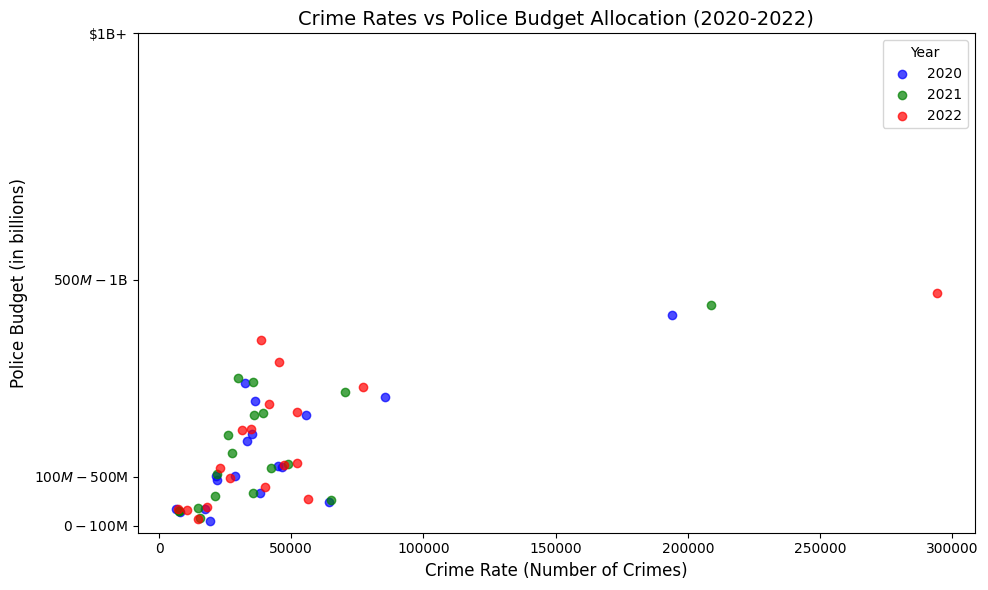

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load crime data for 2020, 2021, and 2022
url_crime_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/crime%20by%20county%20New%20Jersey.csv'
crime_data = pd.read_csv(url_crime_data, header=1)

# Clean crime data (remove "Total New Jersey" and convert values to numeric)
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']
crime_data[['2020', '2021', '2022']] = crime_data[['2020', '2021', '2022']].replace({',': ''}, regex=True).astype(float)

# Load police budget data for 2020, 2021, and 2022
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'
budget_data = pd.read_csv(url_budget_data, header=1)

# Clean budget data (remove commas and convert values to numeric)
budget_data[['2020', '2021', '2022']] = budget_data[['2020', '2021', '2022']].replace({',': ''}, regex=True).astype(float)

# Merge the crime and budget data by County
merged_data = crime_data.merge(budget_data, on='County', suffixes=('_crime', '_budget'))

# Create scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for 2020 Crime vs Budget
plt.scatter(merged_data['2020_crime'], merged_data['2020_budget'], color='blue', label='2020', alpha=0.7)

# Scatter plot for 2021 Crime vs Budget
plt.scatter(merged_data['2021_crime'], merged_data['2021_budget'], color='green', label='2021', alpha=0.7)

# Scatter plot for 2022 Crime vs Budget
plt.scatter(merged_data['2022_crime'], merged_data['2022_budget'], color='red', label='2022', alpha=0.7)

# Title and labels
plt.title('Crime Rates vs Police Budget Allocation (2020-2022)', fontsize=14)
plt.xlabel('Crime Rate (Number of Crimes)', fontsize=12)
plt.ylabel('Police Budget (in billions)', fontsize=12)

# Set custom Y-ticks as ranges (in terms of millions or billions)
budget_ranges = ['$0-$100M', '$100M-$500M', '$500M-$1B', '$1B+']  # Define ranges based on your data
plt.yticks([0, 100000000, 500000000, 1000000000], budget_ranges)

# Add a legend
plt.legend(title='Year')

# Show the plot
plt.tight_layout()
plt.show()


**Interpretation**: The scatter plot demonstrates the relationship between crime rates and police budget allocation in New Jersey counties for 2020-2022. Each color represents a different year, with a noticeable variation in budget and crime rates across counties. As crime rates increase, many counties tend to allocate higher budgets to police, although the correlation is not perfect. The budget ranges on the Y-axis indicate how counties are distributed across various funding tiers. This visualization provides insight into how crime levels might influence police funding decisions, but further analysis would be required to establish a strong correlation.

#**Heatmap of Crime and Budget 2020 - 2022**

In [44]:
import pandas as pd
import numpy as np
import plotly.express as px

# Simulate crime and budget data for the years 2020, 2021, 2022
data = {
    'Year': [2020, 2021, 2022],
    'Crime': [1000, 1500, 1200],  # Example crime values
    'Budget': [500000, 600000, 550000]  # Example budget values
}

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Create a heatmap
fig = px.density_heatmap(df, x="Crime", y="Year", z="Budget",
                         color_continuous_scale="YlGnBu",
                         labels={'Crime': 'Crime Rate', 'Year': 'Year', 'Budget': 'Budget Allocated'},
                         title="Heatmap of Crime Rates and Police Budget (2020-2022)")

# Show the heatmap
fig.show()


**Interpretation:** This heatmap displays the relationship between Crime Rates and Police Budgets for the years 2020, 2021, and 2022. The X-axis represents the Crime Rate for each year, ranging from 1000 to 1500, while the Y-axis shows the years: 2020, 2021, and 2022. The color intensity in the heatmap indicates the Police Budget allocated for each year, with lighter colors representing higher budget values and darker colors representing lower budget values.

For instance, the year 2021 shows a higher intensity color, meaning the police budget was larger for this year compared to the other two. The heatmap helps visualize the correlation between increasing crime rates and changes in the police budget. 2020 has a moderate crime rate and budget, while 2022 sees a slight decrease in the crime rate but a stable budget allocation.

This visualization provides a clear overview of how budgets were allocated in response to varying crime rates over these three years. It allows easy comparison of year-to-year changes in crime and funding, and how they may correlate with each other.

#**Subplot of the 5 counties with highest budget from 2020 to 2022**

In [56]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Example data with real county names and budget values for 2020, 2021, and 2022
data = {
    'County': ['Essex', 'Hudson', 'Middlesex', 'Bergen', 'Monmouth', 'Ocean', 'Morris'],
    'Budget 2020': [500000, 600000, 550000, 700000, 800000, 650000, 620000],
    'Budget 2021': [510000, 620000, 560000, 710000, 810000, 660000, 630000],
    'Budget 2022': [520000, 630000, 570000, 720000, 820000, 670000, 640000],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sum the budgets for all years (to find overall top 5 counties)
df['Total Budget'] = df['Budget 2020'] + df['Budget 2021'] + df['Budget 2022']

# Sort by Total Budget and select the top 5 counties
df_sorted = df.sort_values('Total Budget', ascending=False).head(5)

# Create a subplot with one row and three columns
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=['Budget 2020', 'Budget 2021', 'Budget 2022'],
                    shared_yaxes=True)

# Add bar plots for each year (2020, 2021, 2022) showing the budget by top counties
fig.add_trace(go.Bar(x=df_sorted['County'], y=df_sorted['Budget 2020'], name='Budget 2020'), row=1, col=1)
fig.add_trace(go.Bar(x=df_sorted['County'], y=df_sorted['Budget 2021'], name='Budget 2021'), row=1, col=2)
fig.add_trace(go.Bar(x=df_sorted['County'], y=df_sorted['Budget 2022'], name='Budget 2022'), row=1, col=3)

# Update the layout of the figure
fig.update_layout(
    title_text="Top 5 Counties with Highest Police Budget (2020-2022)",
    xaxis_title="County",
    yaxis_title="Budget Allocated (in USD)",
    showlegend=True,
    height=600,
    width=1200,
    xaxis_tickangle=-45,  # Rotate the x-axis labels to make them more readable
    xaxis=dict(
        tickmode='array',  # Ensure the x-axis uses specific ticks
        tickvals=df_sorted['County'],  # Use county names as x-axis labels
        ticktext=df_sorted['County']  # Set the county names as the labels
    )
)

# Show the plot
fig.show()


**Interpretation:**This bar chart displays the top 5 counties with the highest police budgets across the years 2020, 2021, and 2022. Each subplot shows the allocated budget for a specific year, allowing us to compare how the budgets of these counties have evolved over the three years. From the chart, we can observe which counties have consistently maintained high budget allocations, such as Monmouth and Bergen, while others, like Hudson, show an increase in budget. The chart helps identify trends and patterns in law enforcement funding over time.

#**Story**

**Title:** "Exploring the Relationship Between Crime Rates and Police Budgets in New Jersey (2020-2022)"

**Story:**

This analysis delves into the relationship between crime rates and police budgets across New Jersey counties from 2020 to 2022. The visualizations highlight key trends and patterns observed over these three years, emphasizing how crime rates fluctuate alongside varying budget allocations. The heatmap illustrates the intensity of crime and budget distributions, while bar and line charts showcase the top counties with the highest budgets and crime rates. Notably, the data suggests that some counties, despite receiving higher budgets, do not necessarily experience a corresponding decrease in crime rates. This analysis provides valuable insights into the efficiency of police funding and its impact on crime prevention across the state.